# Load the Iris datset and do 5-fold cross-validation

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
Accuracy,0.947±0.018
BA,0.947±0.018
Precision,0.952±0.016
Recall,0.947±0.018
MCC,0.923±0.026


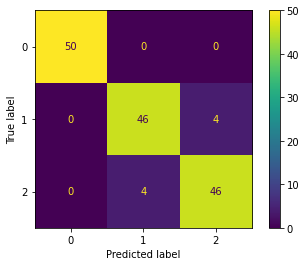

In [6]:
from icarlearn.ensemble.splitvotingens import SplitVotingEnsemble, SplitVotingEnsembleLGBM
from icarlearn.validation.crossvalidate import skfold_cv
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
myscorer = {'Accuracy'  :  (accuracy_score , {}),
             'BA'  :       (balanced_accuracy_score , {}),
             'Precision' : (precision_score, {'pos_label': 1, 'average':'macro'}),
             'Recall' :    (recall_score   , {'pos_label': 1, 'average':'macro'}),
             'MCC' :       (matthews_corrcoef, {}), 
            }
import pandas as pd
clf = RandomForestClassifier()
svclf = SplitVotingEnsemble(clf)
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data['target']
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=3)
df_scores

# Load the kidney dataset

In [2]:
import pandas as pd
def pdread_csv_fromurl(url, sep=',', index_col=None):
    import pycurl
    from io import BytesIO
    crl_obj = pycurl.Curl()
    b_obj = BytesIO()
    crl_obj.setopt(crl_obj.URL, url)
    crl_obj.setopt(crl_obj.WRITEDATA, b_obj)
    crl_obj.perform()
    crl_obj.close()
    b_obj.seek(0)
    return pd.read_table(b_obj, sep=sep, index_col=index_col, encoding='utf-8')

Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
ROC-AUC,0.9150±0.0079
Accuracy,0.8017±0.0039
BA,0.8296±0.0069
Specificity,0.7970±0.0039
Sensitivity,0.8622±0.0126
MCC,0.3924±0.0088


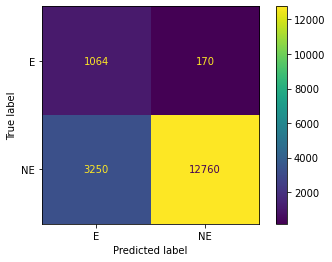

In [7]:
from icarlearn.ensemble.splitvotingens import SplitVotingEnsemble, SplitVotingEnsembleLGBM
from icarlearn.validation.crossvalidate import skfold_cv
from lightgbm import LGBMClassifier
from imblearn.metrics import specificity_score
from sklearn.metrics import *
import numpy as np
myscorer = { 'ROC-AUC':      (roc_auc_score, {'multi_class':'ovr', 'average':'macro'}),
             'Accuracy'  :   (accuracy_score , {}),
             'BA'  :         (balanced_accuracy_score , {}),
             'Specificity' : (specificity_score, {'pos_label': 'E'}),
             'Sensitivity' : (recall_score   , {'pos_label': 'E'}),
             'MCC' :         (matthews_corrcoef, {}), 
            }
clf = LGBMClassifier(n_estimators=200)
svclf = SplitVotingEnsemble(clf)
from sklearn.datasets import load_iris
X = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_BIO.csv", index_col=0)
Y = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_HELP.csv", index_col=0).replace({'aE': 'NE', 'sNE': 'NE'})
shdgenes = np.intersect1d(X.index.values, Y.index.values)
X = X.loc[shdgenes]
Y = Y.loc[shdgenes]
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=4)
df_scores


LinearDiscriminantAnalysis()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification with sveXGB...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
ROC-AUC,0.910717±0.009311
Accuracy,0.793551±0.006862
BA,0.825615±0.009987
Specificity,0.788195±0.007147
Sensitivity,0.863036±0.018081
MCC,0.383543±0.013027


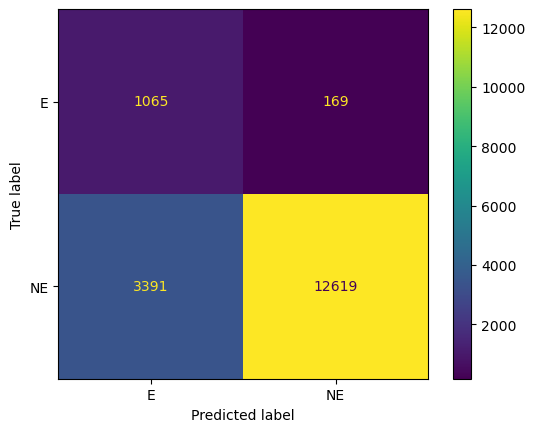

In [9]:
from icarlearn.ensemble.splitvotingens import *
from icarlearn.validation.crossvalidate import skfold_cv
from imblearn.metrics import specificity_score
from sklearn.metrics import *
from HELPpy.utility.utils import pdread_csv_fromurl
import numpy as np

myscorer = { 'ROC-AUC':      (roc_auc_score, {'multi_class':'ovr', 'average':'macro'}),
             'Accuracy'  :   (accuracy_score , {}),
             'BA'  :         (balanced_accuracy_score , {}),
             'Specificity' : (specificity_score, {'pos_label': 'E'}),
             'Sensitivity' : (recall_score   , {'pos_label': 'E'}),
             'MCC' :         (matthews_corrcoef, {}), 
            }
import pandas as pd
#svclf = sveAB()
#svclf = sveRF()
#svclf = sveLDA()
#svclf = sveLGBM()
svclf = sveXGB()
X = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_BIO.csv", index_col=0)
X = X.fillna(X.mean())
Y = pdread_csv_fromurl("https://zenodo.org/records/11917458/files/Brain_HELP.csv", index_col=0).replace({'aE': 'NE', 'sNE': 'NE'})
shdgenes = np.intersect1d(X.index.values, Y.index.values)
X = X.loc[shdgenes]
Y = Y.loc[shdgenes]
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=6)
df_scores

In [6]:
X

<286x43 sparse matrix of type '<class 'numpy.float64'>'
	with 2574 stored elements in Compressed Sparse Row format>

[array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object), array(['ge40', 'lt40', 'premeno'], dtype=object), array(['0-4', '14-Oct', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '9-May'], dtype=object), array(['0-2', '11-Sep', '14-Dec', '15-17', '24-26', '5-Mar', '8-Jun'],
      dtype=object), array(['no', 'yes', nan], dtype=object), array([1, 2, 3]), array(['left', 'right'], dtype=object), array(['central', 'left_low', 'left_up', 'right_low', 'right_up', nan],
      dtype=object), array(['no', 'yes'], dtype=object)]
Classification with ExtraTreeClassifier...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
Accuracy,0.646763±0.029969
BA,0.561958±0.044743
Precision,0.564695±0.044922
Recall,0.561958±0.044743
MCC,0.126550±0.089529


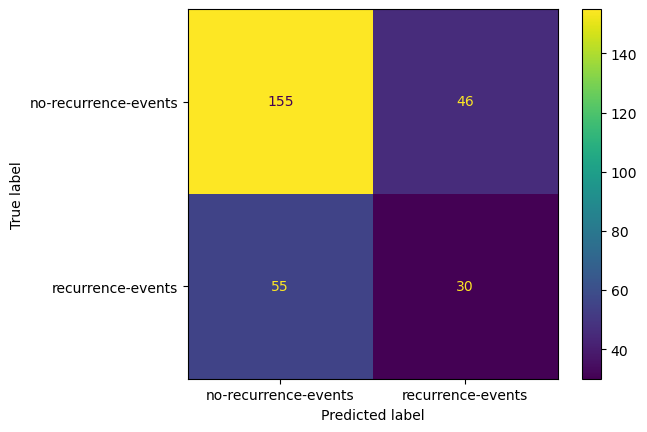

In [25]:
from icarlearn.ensemble.splitvotingens import *
from icarlearn.validation.crossvalidate import skfold_cv
from imblearn.metrics import specificity_score
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
# data (as pandas dataframes) 
X = breast_cancer.data.features 
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X).toarray()
print(enc.categories_)
Y = breast_cancer.data.targets 
svclf = ExtraTreeClassifier(random_state=0)
#svclf = SplittingVotingEnsemble(ExtraTreeClassifier(random_state=0, ), n_voters=1)
#svclf = sveXGB()
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, precision=6)
df_scores